# Linear Transformations

In [73]:
# Settings and imports.
%matplotlib inline
from collections import Counter, OrderedDict, defaultdict
from functools import reduce, partial
from itertools import count, combinations
from math import sqrt, pi, sin, cos, atan, radians, degrees
from random import random, choice
from time import time
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageColor
import seaborn as sns

from drawing import VectorImage, Turtle, show_image

-----

# A) Affine Transformations

TODO: use reduce to simplify

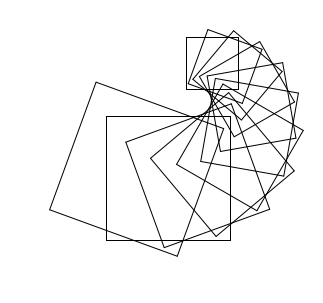

In [100]:
def rotation(angle):
    """Return a matrix in homogeneous coordiantes
       for rotation for given angle (degrees)
    """
    c = cos(radians(angle))
    s = sin(radians(angle))
    return np.matrix([[c, -s, 0], [s, c, 0], [0, 0, 1]])

def scaling(sx, sy):
    return np.matrix([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])

def shear(k):
    return np.matrix([[1, k, 0], [0, 1, 0], [0, 0, 1]])

def translation(tx, ty):
    return np.matrix([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

def combine(*matrices):
    """Return a matrix for transformation m1->m2->m3..."""
    #return m2 * m1
    return reduce(np.matmul, reversed(matrices))
    

def apply(m, lines):
    """Apply transformation `m` to a shape(list of lines).
       Assumes each point in homogeneous coordiantes.
    """
    return [
        tuple(np.array(m.dot(point)).flatten() for point in line)
        for line in lines]

def iterate(m, shape, n=10):
    """Return list of iteratively transformed shapes"""
    transformed = [shape]
    for i in range(n):
        transformed.append(apply(m, transformed[-1]))
    return transformed
        
def square(x=0, y=0, a=1, center=False):
    """Create square in homogeneous coordiantes."""
    if center:
        x -= a/2
        y -= a/2
    p1 = np.array([x, y, 1])
    p2 = np.array([x+a, y, 1])
    p3 = np.array([x+a, y+a, 1])
    p4 = np.array([x, y+a, 1])
    return [(p1, p2), (p2, p3), (p3, p4), (p4, p1)]

def draw(shapes):
    """Draw list of shapes, each shape is a list of lines,
       each line is a tuple of points in homogeneus coordiantes"""
    im = VectorImage()
    for shape in shapes:
        for line in shape:
            line = tuple(p[:2] for p in line)
            im.line(line[0], line[1])
        
shape = square(a=100)
m = combine(combine(rotation(-20), scaling(1.1, 1.1)), translation(5, 10))
draw(iterate(m, shape, n=10))

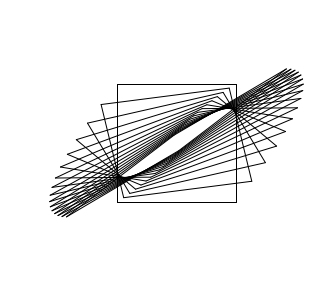

In [101]:
shape = square(a=100, center=True)
transformation = combine(rotation(10), scaling(1.1, 0.8))
draw(iterate(transformation, shape, n=15))

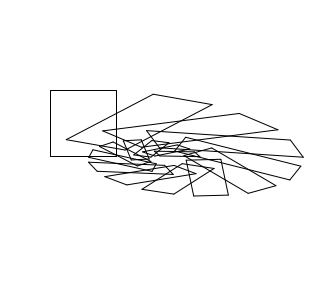

In [103]:
shape = square(a=200, center=False)
transformation = combine(
    shear(1.3), rotation(-10), scaling(0.9, 0.9), translation(50, 50))
draw(iterate(transformation, shape, n=15))

-----

# B) TBA

-----

# C) TBA
